<a href="https://colab.research.google.com/github/letyresina/AnaliseSpotify/blob/main/AnaliseSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import glob
import json
import matplotlib.pyplot as plt

In [6]:
caminho = "./" # Onde estão os arquivos (na raiz nesse caso)

# Listando todos os arquivos JSON
arquivos_json = glob.glob(caminho + "Streaming_History_*.json")


# Lista para armazenar cada dataframe
dfs = []

# Lê cada arquivo e extrai apenas as colunas desejadas
for arquivo in arquivos_json:
    with open(arquivo, "r", encoding="utf-8") as f:
        data = json.load(f)
        df = pd.DataFrame(data)

        # Seleciona apenas as colunas desejadas
        colunas = [
            "username",
            "master_metadata_track_name",
            "master_metadata_album_artist_name",
            "ms_played",
        ]
        df = df[[col for col in colunas if col in df.columns]]

        dfs.append(df)

# Junta todos os DataFrames em um só
df_final = pd.concat(dfs, ignore_index=True)

# Remove faixas sem nome (geralmente podcasts ou dados corrompidos)
df_final = df_final.dropna(subset=["master_metadata_track_name"])

# Filtra apenas músicas tocadas por pelo menos 30 segundos
if "ms_played" in df_final.columns:
    df_final = df_final[df_final["ms_played"] >= 30000]

# Exporta para CSV final -> dados brutos
df_final.to_csv("spotify_history.csv", index=False, encoding="utf-8")

In [7]:
print(df_final.head(10))

   master_metadata_track_name master_metadata_album_artist_name  ms_played
4     Que Saudade da Minha Ex                     MC Maneirinho     132973
6     Que Saudade da Minha Ex                     MC Maneirinho      81571
12                Cai de Boca                           Rebecca     215737
13                  Ela É Top                           Mc Bola      33818
14       É Por Isso Que Sofre                         Dj Batata     164307
20               Chupa *o*ota                             Mc 2k     147748
21              Efeito Dominó                         Dj Batata      67952
22    Meu Piloto - Remix Funk                    DJ Lukinha Mix      63947
30                Devagarinho                            Delano     144222
53             Aquariano Nato                           MC Saci     116307


In [10]:
# Contagem de repetições

df_contagem = (
    df_final.groupby(["master_metadata_album_artist_name", "master_metadata_track_name"])
    .size()
    .reset_index(name="vezes_tocada")
    .sort_values(by="vezes_tocada", ascending=False)
)

# Exporta o CSV com contagem de repetições
df_contagem.to_csv("spotify_musicas_mais_tocadas.csv", index=False, encoding="utf-8")

In [11]:
print(df_contagem.head(10))

     master_metadata_album_artist_name master_metadata_track_name  \
4046                         Sam Smith  Unholy (feat. Kim Petras)   
3971                 Sabrina Carpenter                   Espresso   
4649                             Tibba                  Ring Ring   
3854                           Rihanna            Breakin' Dishes   
399                      Ashley Sienna              What You Need   
865                       Carol Biazin           ligações de alma   
2644                       Luísa Sonza                    Surreal   
317                     Arctic Monkeys                   Arabella   
1810                       Griffinilla          Below the Surface   
3878                           Rihanna                        Woo   

      vezes_tocada  
4046           253  
3971           229  
4649           193  
3854           177  
399            156  
865            154  
2644           143  
317            139  
1810           133  
3878           132  


In [13]:
# 🎤 Contagem de artistas mais ouvidos
df_artistas = (
    df_final['master_metadata_album_artist_name']
    .value_counts()                          # Conta quantas vezes cada artista aparece
    .reset_index()                           # Transforma em DataFrame
)

df_artistas.columns = ['artista', 'vezes_tocadas']  # Renomeia as colunas

df_artistas = df_artistas.sort_values(by='vezes_tocadas', ascending=False)

df_artistas.to_csv("spotify_artistas_mais_ouvidos.csv", index=False, encoding='utf-8')

In [14]:
print(df_artistas.head(10))

             artista  vezes_tocadas
0  Sabrina Carpenter           1625
1                Jão            972
2       Carol Biazin            573
3            Rihanna            522
4       Taylor Swift            507
5  Baco Exu do Blues            467
6      Ariana Grande            438
7             Anitta            413
8        Luísa Sonza            410
9             M4rkim            368


/tmp/ipython-input-1110861849.py:9: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


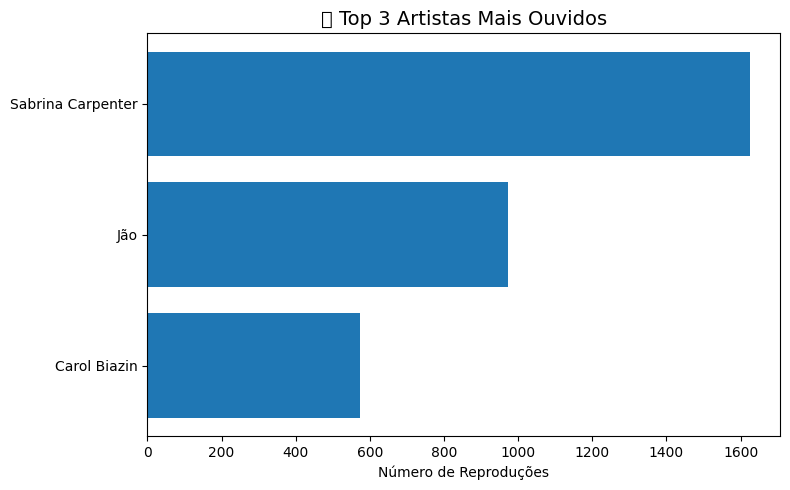

In [16]:
# Seleciona os 3 artistas mais ouvidos
top03 = df_artistas.head(3)

plt.figure(figsize=(8,5))
plt.barh(top03['artista'], top03['vezes_tocadas'])
plt.gca().invert_yaxis()  # deixa o mais ouvido em cima
plt.title('🎧 Top 3 Artistas Mais Ouvidos', fontsize=14)
plt.xlabel('Número de Reproduções')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3092791002.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-3092791002.py:15: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


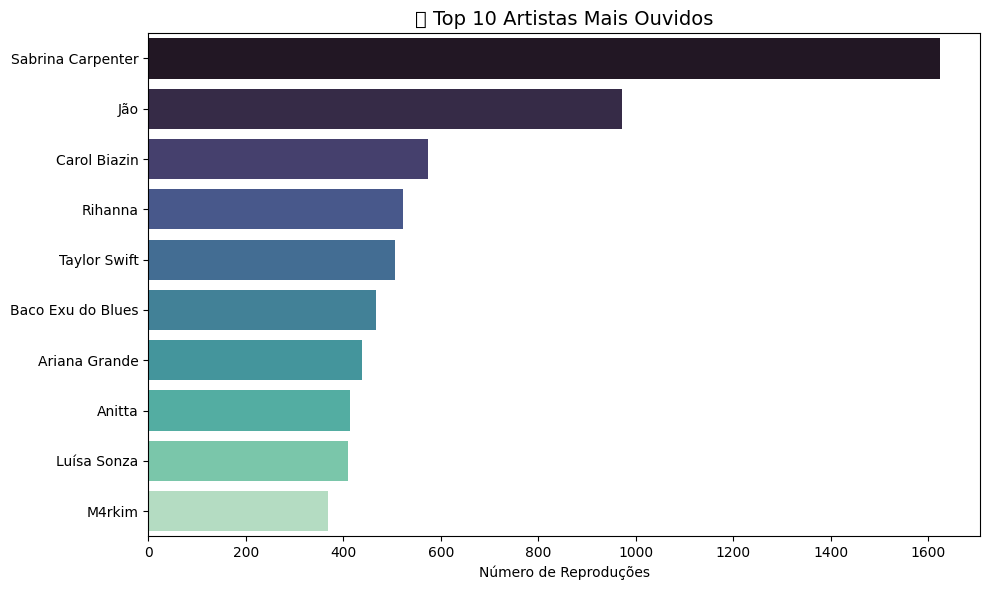

In [17]:
import seaborn as sns

top10 = df_artistas.head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10,
    y='artista',
    x='vezes_tocadas',
    palette='mako'  # paleta de cores bonita
)
plt.title('🎧 Top 10 Artistas Mais Ouvidos', fontsize=14)
plt.xlabel('Número de Reproduções')
plt.ylabel('')
plt.tight_layout()
plt.show()